In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1aa90390-4d54-4135-b80e-d3f80ceb4394',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2025-01-28T16:37:18.907Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 10768}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11884, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df=pd.json_normalize(data['data'])
df['time_stamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981630e+07,1.981630e+07,False,NaN,1,None,None,None,2025-01-28T16:35:00.000Z,102305.863977,5.402542e+10,-29.3499,-1.121710,1.858824,-2.954643,9.233874,4.254235,42.119347,2.027323e+12,58.1505,2.148423e+12,None,2025-01-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:26.325629
1,1027,Ethereum,ETH,ethereum,9901,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205120e+08,1.205120e+08,True,NaN,2,None,None,None,2025-01-28T16:36:00.000Z,3160.312450,2.176546e+10,-39.0587,-1.286411,1.803633,-4.577077,-5.457930,-12.192012,17.724216,3.808557e+11,10.9242,3.808557e+11,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:26.325629
2,52,XRP,XRP,xrp,1518,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.764121e+10,9.998659e+10,False,NaN,3,None,None,None,2025-01-28T16:36:00.000Z,3.175623,9.969482e+09,-30.4669,-0.996950,6.580159,0.275175,48.371870,86.969927,507.538017,1.830467e+11,5.2488,3.175623e+11,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:26.325629
3,825,Tether USDt,USDT,tether,114981,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.394574e+11,1.415730e+11,True,NaN,4,None,None,None,2025-01-28T16:34:00.000Z,1.000231,9.932867e+10,-33.1368,0.042748,0.022156,0.065742,0.190843,-0.095894,0.048993,1.394896e+11,3.9998,1.416057e+11,None,2025-01-28T16:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-28 19:37:26.325629
4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.866697e+08,5.928814e+08,True,NaN,5,None,None,None,2025-01-28T16:35:00.000Z,236.099092,5.999100e+09,-39.3714,-1.155562,1.402544,-3.927411,22.086520,-3.009203,35.421231,1.149023e+11,3.2958,1.399788e+11,None,2025-01-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:26.325629
5,1839,BNB,BNB,bnb,2344,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424808e+08,1.424808e+08,False,NaN,6,None,None,None,2025-01-28T16:36:00.000Z,671.537968,1.736866e+09,-21.6968,-0.636950,0.993996,-2.992075,-4.573788,2.096459,12.271493,9.568129e+10,2.7436,9.568129e+10,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:26.325629
6,3408,USDC,USDC,usd-coin,25255,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.244829e+10,5.244829e+10,False,NaN,7,None,None,None,2025-01-28T16:35:00.000Z,1.000139,8.964276e+09,-31.1323,0.006010,0.009334,-0.033213,0.013799,0.004806,0.031813,5.245558e+10,1.5046,5.245558e+10,None,2025-01-28T16:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-28 19:37:26.325629
7,74,Dogecoin,DOGE,dogecoin,1158,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.478124e+11,1.478124e+11,True,NaN,8,None,None,None,2025-01-28T16:36:00.000Z,0.330649,2.098407e+09,-50.5139,-1.410128,0.950446,-13.022028,4.921123,-21.663117,97.376720,4.887404e+10,1.4014,4.887404e+10,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:26.325629
8,2010,Cardano,ADA,cardano,1452,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contr

In [7]:


df= pd.DataFrame()


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1aa90390-4d54-4135-b80e-d3f80ceb4394',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    

   
    df20= pd.json_normalize(data['data'])
    df20['time_stamp']= pd.to_datetime('now')
    df = pd.concat([df,df20] , ignore_index = True)

    



In [16]:
# if you want to make it an csv file
"""
df= pd.DataFrame()


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
     'start':'1',
      'limit':'10',
     'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1aa90390-4d54-4135-b80e-d3f80ceb4394',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
     #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    

   
    df= pd.json_normalize(data['data'])
    df['time_stamp']= pd.to_datetime('now')
    df


    if not os.path.isfile(r'C:\Users\Dell\OneDrive\Desktop\python api file\API.csv'):
        df.to_csv(r'C:\Users\Dell\OneDrive\Desktop\python api file\API.csv', header='column names')
    else:
        df.to_csv(r'C:\Users\Dell\OneDrive\Desktop\python api file\API.csv', mode='a', header=False)
"""


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 735-736: truncated \UXXXXXXXX escape (610554228.py, line 2)

In [18]:
# to read the csv file
#pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\python api file\API.csv')


In [9]:
import os
from time import time, sleep

for i in range(333):
    api_runner()
    print('api runner completed')
    sleep(60) #sleep for 60 seconds then the fuction will run again


api runner completed
api runner completed
api runner completed
api runner completed
api runner completed


KeyboardInterrupt: 

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981630e+07,1.981630e+07,False,NaN,1,None,None,None,2025-01-28T16:35:00.000Z,102305.863977,5.402542e+10,-29.3499,-1.121710,1.858824,-2.954643,9.233874,4.254235,42.119347,2.027323e+12,58.1505,2.148423e+12,None,2025-01-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
1,1027,Ethereum,ETH,ethereum,9901,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205120e+08,1.205120e+08,True,NaN,2,None,None,None,2025-01-28T16:36:00.000Z,3160.312450,2.176546e+10,-39.0587,-1.286411,1.803633,-4.577077,-5.457930,-12.192012,17.724216,3.808557e+11,10.9242,3.808557e+11,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
2,52,XRP,XRP,xrp,1518,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.764121e+10,9.998659e+10,False,NaN,3,None,None,None,2025-01-28T16:36:00.000Z,3.175623,9.969482e+09,-30.4669,-0.996950,6.580159,0.275175,48.371870,86.969927,507.538017,1.830467e+11,5.2488,3.175623e+11,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
3,825,Tether USDt,USDT,tether,114981,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.394574e+11,1.415730e+11,True,NaN,4,None,None,None,2025-01-28T16:34:00.000Z,1.000231,9.932867e+10,-33.1368,0.042748,0.022156,0.065742,0.190843,-0.095894,0.048993,1.394896e+11,3.9998,1.416057e+11,None,2025-01-28T16:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-28 19:37:41.821175
4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.866697e+08,5.928814e+08,True,NaN,5,None,None,None,2025-01-28T16:35:00.000Z,236.099092,5.999100e+09,-39.3714,-1.155562,1.402544,-3.927411,22.086520,-3.009203,35.421231,1.149023e+11,3.2958,1.399788e+11,None,2025-01-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
5,1839,BNB,BNB,bnb,2344,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424808e+08,1.424808e+08,False,NaN,6,None,None,None,2025-01-28T16:36:00.000Z,671.537968,1.736866e+09,-21.6968,-0.636950,0.993996,-2.992075,-4.573788,2.096459,12.271493,9.568129e+10,2.7436,9.568129e+10,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
6,3408,USDC,USDC,usd-coin,25255,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.244829e+10,5.244829e+10,False,NaN,7,None,None,None,2025-01-28T16:35:00.000Z,1.000139,8.964276e+09,-31.1323,0.006010,0.009334,-0.033213,0.013799,0.004806,0.031813,5.245558e+10,1.5046,5.245558e+10,None,2025-01-28T16:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-28 19:37:41.821175
7,74,Dogecoin,DOGE,dogecoin,1158,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.478124e+11,1.478124e+11,True,NaN,8,None,None,None,2025-01-28T16:36:00.000Z,0.330649,2.098407e+09,-50.5139,-1.410128,0.950446,-13.022028,4.921123,-21.663117,97.376720,4.887404e+10,1.4014,4.887404e+10,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
8,2010,Cardano,ADA,cardano,1452,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contr

In [13]:
pd.set_option('display.float_format', lambda x: '%5f' % x)                    # to change the format of the numbers

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19816296.000000,19816296.000000,False,NaN,1,None,None,None,2025-01-28T16:35:00.000Z,102305.863977,54025423183.291985,-29.349900,-1.121710,1.858824,-2.954643,9.233874,4.254235,42.119347,2027323283095.065430,58.150500,2148423143507.560059,None,2025-01-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
1,1027,Ethereum,ETH,ethereum,9901,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120512039.589926,120512039.589926,True,NaN,2,None,None,None,2025-01-28T16:36:00.000Z,3160.312450,21765457483.994465,-39.058700,-1.286411,1.803633,-4.577077,-5.457930,-12.192012,17.724216,380855699058.419250,10.924200,380855699058.419983,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
2,52,XRP,XRP,xrp,1518,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.000000,57641211234.000000,99986586496.000000,False,NaN,3,None,None,None,2025-01-28T16:36:00.000Z,3.175623,9969482493.706894,-30.466900,-0.996950,6.580159,0.275175,48.371870,86.969927,507.538017,183046744797.776001,5.248800,317562280318.299988,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
3,825,Tether USDt,USDT,tether,114981,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,139457358263.177551,141572991334.018860,True,NaN,4,None,None,None,2025-01-28T16:34:00.000Z,1.000231,99328671920.323288,-33.136800,0.042748,0.022156,0.065742,0.190843,-0.095894,0.048993,139489569806.880402,3.999800,141605691541.839996,None,2025-01-28T16:34:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-28 19:37:41.821175
4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,486669695.860416,592881369.767908,True,NaN,5,None,None,None,2025-01-28T16:35:00.000Z,236.099092,5999100227.460481,-39.371400,-1.155562,1.402544,-3.927411,22.086520,-3.009203,35.421231,114902273111.265045,3.295800,139978752840.179993,None,2025-01-28T16:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
5,1839,BNB,BNB,bnb,2344,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480836.720000,142480836.720000,False,NaN,6,None,None,None,2025-01-28T16:36:00.000Z,671.537968,1736866454.666761,-21.696800,-0.636950,0.993996,-2.992075,-4.573788,2.096459,12.271493,95681291591.415665,2.743600,95681291591.419998,None,2025-01-28T16:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 19:37:41.821175
6,3408,USDC,USDC,usd-coin,25255,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52448290790.139671,52448290790.139671,False,NaN,7,None,None,None,2025-01-28T16:35:00.000Z,1.000139,8964275787.814617,-31.132300,0.006010,0.009334,-0.033213,0.013799,0.004806,0.031813,52455576638.166351,1.504600,52455576638.169998,None,2025-01-28T16:35:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-28 19:37:41.821175
7,74,Dogecoin,DOGE,dogecoin,1158,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147812436383.705231,147812436383.705200,True,NaN,8,None,None,None,2025-01-28T16:36:00.000Z,0.330649,2098406762.285079,-50.513900,

In [17]:
df3= df.groupby('name', sort= False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.035069,2.263650,-2.645066,9.297749,4.343445,42.003137
Ethereum,-1.311876,2.050700,-4.475147,-5.518815,-12.222127,17.619756
XRP,-0.914388,7.288794,0.351574,48.363227,86.966144,507.542639
Tether USDt,-0.003680,-0.007434,0.052169,0.183099,-0.112382,0.030977
Solana,-1.417287,1.707139,-3.787249,21.923789,-3.019354,35.032614
BNB,-0.601451,1.203198,-2.935170,-4.604659,2.085613,12.227677
USDC,-0.005612,-0.003179,-0.019369,0.000955,-0.007321,0.016502
Dogecoin,-1.430051,1.573420,-13.040789,4.851759,-21.746026,97.339719
Cardano,-1.870340,3.354358,-5.687665,8.633310,-10.639269,165.842654


In [19]:
df4= df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -1.035069
             quote.USD.percent_change_24h     2.263650
             quote.USD.percent_change_7d     -2.645066
             quote.USD.percent_change_30d     9.297749
             quote.USD.percent_change_60d     4.343445
             quote.USD.percent_change_90d    42.003137
Ethereum     quote.USD.percent_change_1h     -1.311876
             quote.USD.percent_change_24h     2.050700
             quote.USD.percent_change_7d     -4.475147
             quote.USD.percent_change_30d    -5.518815
             quote.USD.percent_change_60d   -12.222127
             quote.USD.percent_change_90d    17.619756
XRP          quote.USD.percent_change_1h     -0.914388
             quote.USD.percent_change_24h     7.288794
             quote.USD.percent_change_7d      0.351574
             quote.USD.percent_change_30d    48.363227
             quote.USD.percent_change_60d    86.966144
             quote.USD.

In [21]:
type(df4)         # the type of df4 is series so we need to conevert it back into an dataframe

pandas.core.series.Series

In [23]:
df5= df4.to_frame(name= 'values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -1.035069
            quote.USD.percent_change_24h   2.263650
            quote.USD.percent_change_7d   -2.645066
            quote.USD.percent_change_30d   9.297749
            quote.USD.percent_change_60d   4.343445
            quote.USD.percent_change_90d  42.003137
Ethereum    quote.USD.percent_change_1h   -1.311876
            quote.USD.percent_change_24h   2.050700
            quote.USD.percent_change_7d   -4.475147
            quote.USD.percent_change_30d  -5.518815
            quote.USD.percent_change_60d -12.222127
            quote.USD.percent_change_90d  17.619756
XRP         quote.USD.percent_change_1h   -0.914388
            quote.USD.percent_change_24h   7.288794
            quote.USD.percent_change_7d    0.351574
            quote.USD.percent_change_30d  48.363227
            quote.USD.percent_change_60d  86.966144
            quote.USD.percent_change_90d 507.542639
Tether USDt quote.USD.percent_change_1h   -0.003680
            quote.USD.percent_change_24h  -0.007434
            quote.USD.percent_change_7d    0.052169
            quote.USD.percent_change_30d   0.183099
            quote.USD.percent_change_60d  -0.112382
            quote.USD.percent_change_90d   0.030977
Solana      quote.USD.percent_change_1h   -1.417287
            quote.USD.percent_change_24h   1.707139
            quote.USD.percent_change_7d   -3.787249
            quote.USD.percent_change_30d  21.923789
            quote.USD.percent_change_60d  -3.019354
            quote.USD.percent_change_90d  35.032614
BNB         quote.USD.percent_change_1h   -0.601451
            quote.USD.percent_change_24h   1.203198
            quote.USD.percent_change_7d   -2.935170
            quote.USD.percent_change_30d  -4.604659
            quote.USD.percent_change_60d   2.085613
            quote.USD.percent_change_90d  12.227677
USDC        quote.USD.percent_change_1h   -0.005612
            quote.USD.percent_change_24h  -0.003179
            quote.USD.percent_change_7d   -0.019369
            quote.USD.percent_change_30d   0.000955
            quote.USD.percent_change_60d  -0.007321
            quote.USD.percent_change_90d   0.016502
Dogecoin    quote.USD.percent_change_1h   -1.430051
            quote.USD.percent_change_24h   1.573420
            quote.USD.percent_change_7d  -13.040789
            quote.USD.percent_change_30d   4.851759
            quote.USD.percent_change_60d -21.746026
            quote.USD.percent_change_90d  97.339719
Cardano     quote.USD.percent_change_1h   -1.870340
            quote.USD.percent_change_24h   3.354358
            quote.USD.percent_change_7d   -5.687665
            quote.USD.percent_change_30d   8.633310
            quote.USD.percent_change_60d -10.639269
            quote.USD.percent_change_90d 165.842654
TRON        quote.USD.percent_change_1h   -0.650413
            quote.USD.percent_change_24h   0.405985
            quote.USD.percent_change_7d    1.144104
            quote.USD.percent_change_30d  -5.559757
            quote.USD.percent_change_60d  19.639941
            quote.USD.percent_change_90d  45.127101

In [25]:
df5.count()

values    60
dtype: int64

In [27]:
index= pd.Index(range(60))
df6= df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.035069
1,Bitcoin,quote.USD.percent_change_24h,2.263650
2,Bitcoin,quote.USD.percent_change_7d,-2.645066
3,Bitcoin,quote.USD.percent_change_30d,9.297749
4,Bitcoin,quote.USD.percent_change_60d,4.343445
5,Bitcoin,quote.USD.percent_change_90d,42.003137
6,Ethereum,quote.USD.percent_change_1h,-1.311876
7,Ethereum,quote.USD.percent_change_24h,2.050700
8,Ethereum,quote.USD.percent_change_7d,-4.475147
9,Ethereum,quote.USD.percent_change_30d,-5.518815


In [30]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.035069
1,Bitcoin,quote.USD.percent_change_24h,2.263650
2,Bitcoin,quote.USD.percent_change_7d,-2.645066
3,Bitcoin,quote.USD.percent_change_30d,9.297749
4,Bitcoin,quote.USD.percent_change_60d,4.343445
5,Bitcoin,quote.USD.percent_change_90d,42.003137
6,Ethereum,quote.USD.percent_change_1h,-1.311876
7,Ethereum,quote.USD.percent_change_24h,2.050700
8,Ethereum,quote.USD.percent_change_7d,-4.475147
9,Ethereum,quote.USD.percent_change_30d,-5.518815


In [49]:
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-1.035069
1,Bitcoin,24h,2.263650
2,Bitcoin,7d,-2.645066
3,Bitcoin,30d,9.297749
4,Bitcoin,60d,4.343445
5,Bitcoin,90d,42.003137
6,Ethereum,1h,-1.311876
7,Ethereum,24h,2.050700
8,Ethereum,7d,-4.475147
9,Ethereum,30d,-5.518815


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

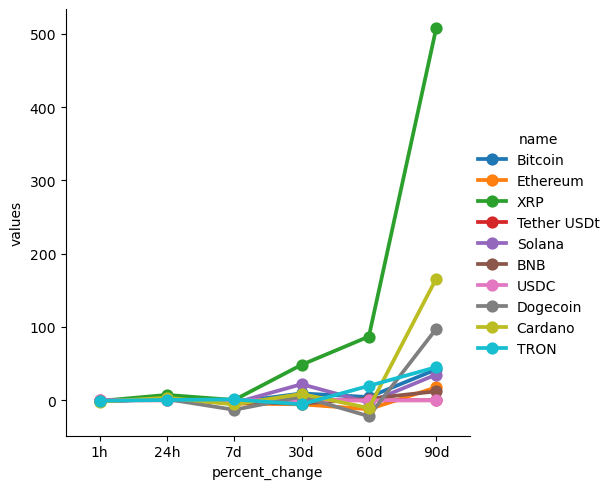

In [51]:
sns.catplot(x= 'percent_change', y= 'values',hue= 'name', data= df7, kind= 'point')

In [53]:
# pull out a specific data

In [69]:
df9= df[['name','quote.USD.price','time_stamp']]
df9=df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,time_stamp
0,Bitcoin,102305.863977,2025-01-28 19:37:41.821175
10,Bitcoin,102253.960835,2025-01-28 19:38:42.506626
20,Bitcoin,102225.264823,2025-01-28 19:39:43.177122
30,Bitcoin,102366.698348,2025-01-28 19:40:43.991294
40,Bitcoin,102314.162576,2025-01-28 19:41:44.659496


<Axes: xlabel='time_stamp', ylabel='quote.USD.price'>

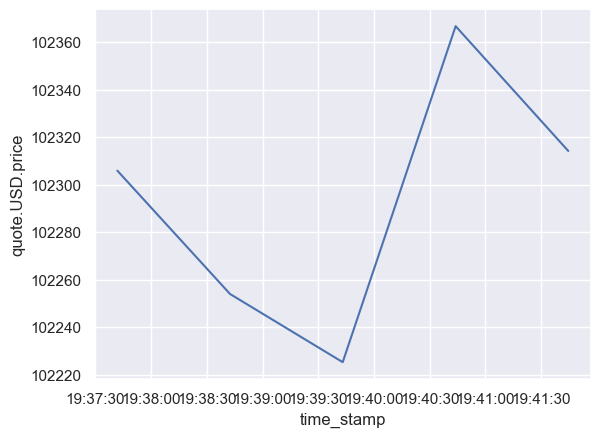

In [73]:
sns.set_theme(style= 'darkgrid')
sns.lineplot(x= 'time_stamp', y= 'quote.USD.price', data= df9) 